In [1]:
%load_ext autoreload
%autoreload 2

import nest
import sys
import os.path
import numpy as np
from math import degrees
import matplotlib.pyplot as plt

sys.path.append('../')
import params
import nest_tools
import mnist_tools

# reseed numpy
np.random.seed(0)

# create samples

# load data - some preprocessing is done in the module (reshaping)
(x_train, y_train), (x_val, y_val), (x_test, y_test) = mnist_tools.load_mnist_data('../mnist.pkl.gz')

# create pixel samples
pixel_samples = mnist_tools.create_samples(4000, sample_size=40)

######### rate 15000.000000000004


## Testing different values for g

Run the network on ten samples of the input digits 0, 1, 2, 3, ... , 9 each - then calculate the entropy for each neuron at the input and at the output and compare.

(100, 28, 28)


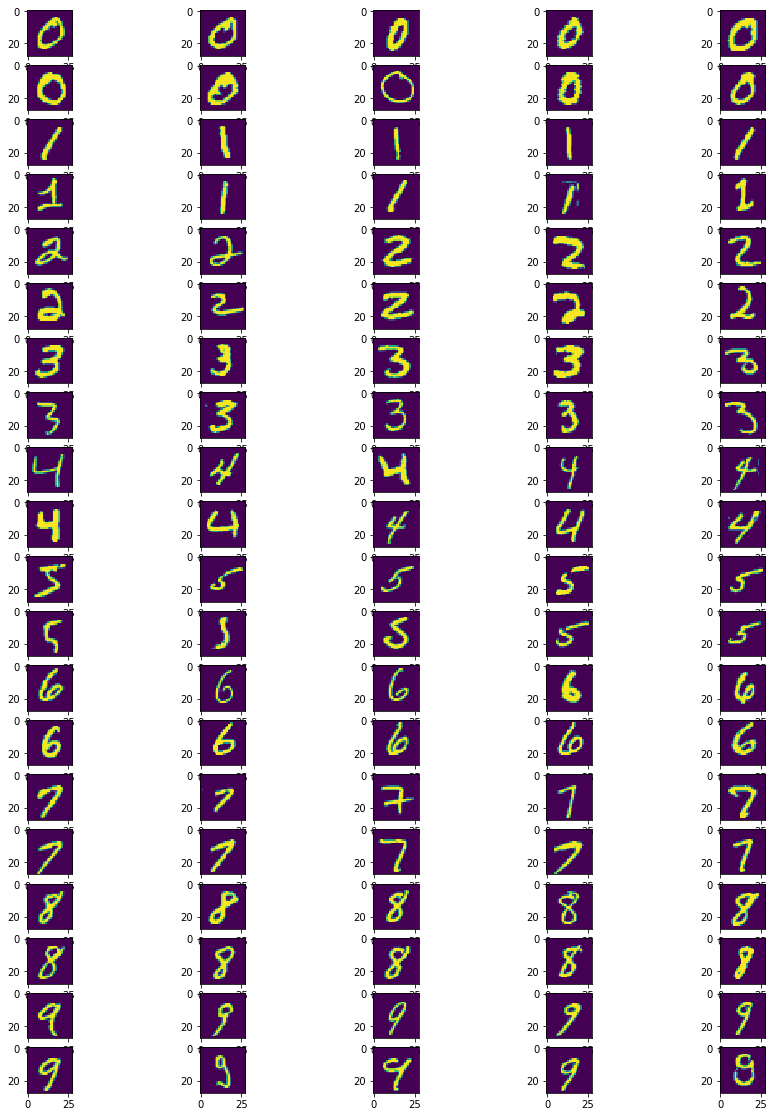

In [2]:
# create training set
digits = np.concatenate([ mnist_tools.get_sample_digits(x_train, y_train, 10, i) for i in range(100) ])
digit_labels = np.concatenate([ [i//10] for i in range(100) ])

plt.figure(figsize=(15,40))
for i, digit in enumerate(digits):
    plt.subplot(40,5, i+1)
    plt.imshow(digit)
    
print(digits.shape)

In [3]:
def simulate(rates, digits, digit_labels, name, duration=1000.0):
    network = nest_tools.Network()
    network.reset_nest()
    network.setup_static_network()
    network.record_spikes(name)
    
    for i, digit in enumerate(digits):
        # set rate for every neuron

        for j, rate in enumerate(rates[i]):
            network.set_rate([j+1], rate)

        print(str(i+1)+". stimulus = "+str(digit_labels[i])+", simulating for", duration)
        nest.Simulate(duration)

    network.save_recording(name)

In [ ]:
input_rates = mnist_tools.calc_rates(digits, pixel_samples, standardize_per_digit=True) * params.rate
mean_input_rates_per_digit =  mnist_tools.mean_rates_per_digit(digit_labels, input_rates)
input_entropies = mnist_tools.calc_entropies(mean_input_rates_per_digit)

for g in [2, 5, 8, 11]:
    params.g = float(g)
    if not os.path.exists('result'+str(g)+'.0.npy'):
        simulate(input_rates, digits, digit_labels, 'result'+str(g))
    
    recording = nest_tools.SpikeRecording.from_file('result'+str(g))

    output_rates = np.stack([recording.rate(range(1,4001), i*1000, (i+1)*1000.0) for i in range(len(digits))])
    mean_output_rates_per_digit = mnist_tools.mean_rates_per_digit(digit_labels, output_rates)
    output_entropies = mnist_tools.calc_entropies(mean_output_rates_per_digit)

    plt.figure()
    recording.plot(neurons=range(1,4000,10), start=5000, end=10000)
    
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,1)
    plt.title("input rates")
    plt.hist(input_rates.ravel(), bins=200)

    plt.subplot(2,2,2)
    plt.title("output rates")
    plt.hist(output_rates.ravel(), bins=200)

    plt.subplot(2,2,3)
    plt.title("input entropies")
    plt.hist(input_entropies, bins=200)

    plt.subplot(2,2,4)
    plt.title("output entropies")
    plt.hist(output_entropies, bins=200)
    
    plt.figure(figsize=(8,8))
    plt.scatter(input_entropies, output_entropies, s=0.2)
    plt.xlabel("input entropy")
    plt.ylabel("output entropy")
    plt.plot([0,4], [0,4])

1. stimulus = 0, simulating for 1000.0
2. stimulus = 0, simulating for 1000.0
3. stimulus = 0, simulating for 1000.0
4. stimulus = 0, simulating for 1000.0
5. stimulus = 0, simulating for 1000.0
6. stimulus = 0, simulating for 1000.0
7. stimulus = 0, simulating for 1000.0
8. stimulus = 0, simulating for 1000.0
9. stimulus = 0, simulating for 1000.0
10. stimulus = 0, simulating for 1000.0
11. stimulus = 1, simulating for 1000.0
12. stimulus = 1, simulating for 1000.0
13. stimulus = 1, simulating for 1000.0
14. stimulus = 1, simulating for 1000.0
15. stimulus = 1, simulating for 1000.0
16. stimulus = 1, simulating for 1000.0
17. stimulus = 1, simulating for 1000.0
18. stimulus = 1, simulating for 1000.0
19. stimulus = 1, simulating for 1000.0
20. stimulus = 1, simulating for 1000.0
21. stimulus = 2, simulating for 1000.0
22. stimulus = 2, simulating for 1000.0
23. stimulus = 2, simulating for 1000.0
24. stimulus = 2, simulating for 1000.0
25. stimulus = 2, simulating for 1000.0
26. stimu